## Project description

The aim of this project is to generate random first names according to probability distribution of Polish names. For this purpose:
1. List of Polish first names was obtained from Wikipedia site.
2. Each name was assigned its category of origin and gender.
3. Based on data from steps 1. and 2. LSTM recurrent neural network was trained. Trained model is character-level _language models_ e.g. in each time step each model generates probability of the next character.
4. According to character distribution generated by model sample of first names was generated.

From technical side the following Python packages were used:
1. Scrapy - Wikipedia web scrapping.
2. Pandas - extraction of names' category and gender from scrapped data.
3. Pytorch - LSTM model definition and model training.

Here are sample results of generation of first names of Polish language:

In [17]:
# this cell was copied from file "03 Build model.ipynb"
# names_learner_t80_v20.generate_and_print_names()

## Project steps description.

### Step 1. Description of scrapping Wikipedia site (code: 01 Web scrapping names.ipynb)
To obtain list of Polish names and it's category of origin Wikipedia site: "https://pl.wikipedia.org/wiki/Kategoria:Alfabetyczna_lista_imion" was scrapped. Scrapping was done with the Python package: scrapy. Scrapy makes very easy to move from one site to next using hyperlinks found on current web site. The Wikipedia site: "https://pl.wikipedia.org/wiki/Kategoria:Alfabetyczna_lista_imion" contains links to web pages with list of first names. Below is picture of the wikipedia site.

<img src="img/Wikipedia First names main site.png" />

Scrapy was programmed to follow links under each letter of alphabet. Each link leads to web page like this:

<img src="img/Wikipedia First names list.png" />

Each of this kind of site contains links to first names' descriptions. Web page with sample first name description is given below. First paragraph  was scrapped for each name (first paragraph is marked with red rectangle in the picture below). Information in this first paragraph was used to assign category of origin and gender for each name.

<img src="img/Wikipedia Sample first name description.png" />

Web scrapping results were saved in JSON file: `01 Web scrapping/scrapped_wiki_names.json`

Scrapy project is located in folder: `01 Web scrapping`. Python code to scrap Wikipedia first names is located in file `01 Web scrapping/scrap_wiki_names/spiders/Wiki names spider.py`. To run scrapy the following command: `scrapy crawl wiki_names -o scrapped_wiki_names.json` should be executed from command line from catalog `01 Web scrapping`. To properly execute this command, before running it, please delete or rename existing output file: `01 Web scrapping/scrapped_wiki_names.json`.

### Step 2. Assigning to each first name category of origin and gender (code: 02 Prepare training data.ipynb)

In this step data collected by Wikipedia crawler is read. Next crawled data is transformed and name category and gender is extracted from names' descriptions. Because names descriptions on Wikipedia are not structured there was much manual work of data cleaning and text processing. Many assignments of category and gender were made manually. Below is a sample of names' descriptions after assignment to category of origin and gender. The table of this form (for all names) is a result table of step: `02 Prepare training data`. The result table is saved in file: `02 Input data\wiki_names_with_descriptions.csv`.

<img src="img/Sample names with descriptions and assignments to category and gender.png" />

### Step 3. Model specification and training (code: 03 Build model.ipynb)

The aim of this project is to train model of Polish names distribution. For this purpose character-level language model was defined based on LSTM architecture. For model definition and training Pytorch package was used. Model architecture for forward pass for exemplary name="Adam" is presented below:

<img src="img/Model diagram.png" />

Defining model architecture is strictly connected with hyperparameters. Setting up model hyperparameters is very important for model training. Model hyperparameters define model structure and influence ability of learning algorithm to find loss minimum with respect to model parameters. During experimenting with different hyperparameters the following observations were made:
1. Models trained with lower number of parameters usually are not overfitting to training data. On the other side names generated by those models are usually generated with the same pattern e.g. male Slavic names usually end with suffix "-sław". There is a lack of diversity of names suffixes.
2. Models trained to minimalize loss function usually have higher number of parameters which results in overfitting. Despite this loss on validation data set was usually smaller than for models from step 1 above. Names generated by those models were in majority real names that is model learned distribution of real names.

To generate names which resemble real names compromise was made between approaches described in steps 1. and 2. The results of training process are presented below.

Epoch: 1 	Train set loss:     1.860 	Valid set loss:     1.868 	Percentage relation:  100.47%
Epoch: 2 	Train set loss:     1.702 	Valid set loss:     1.728 	Percentage relation:  101.50%
Epoch: 3 	Train set loss:     1.621 	Valid set loss:     1.647 	Percentage relation:  101.63%
Epoch: 4 	Train set loss:     1.570 	Valid set loss:     1.601 	Percentage relation:  101.99%
Epoch: 5 	Train set loss:     1.520 	Valid set loss:     1.571 	Percentage relation:  103.34%
Epoch: 6 	Train set loss:     1.497 	Valid set loss:     1.549 	Percentage relation:  103.42%
Epoch: 7 	Train set loss:     1.456 	Valid set loss:     1.507 	Percentage relation:  103.51%
Epoch: 8 	Train set loss:     1.456 	Valid set loss:     1.502 	Percentage relation:  103.19%
Epoch: 9 	Train set loss:     1.432 	Valid set loss:     1.486 	Percentage relation:  103.78%
Epoch: 10 	Train set loss:     1.404 	Valid set loss:     1.464 	Percentage relation:  104.21%
Epoch: 11 	Train set loss:     1.391 	Valid set loss:     1

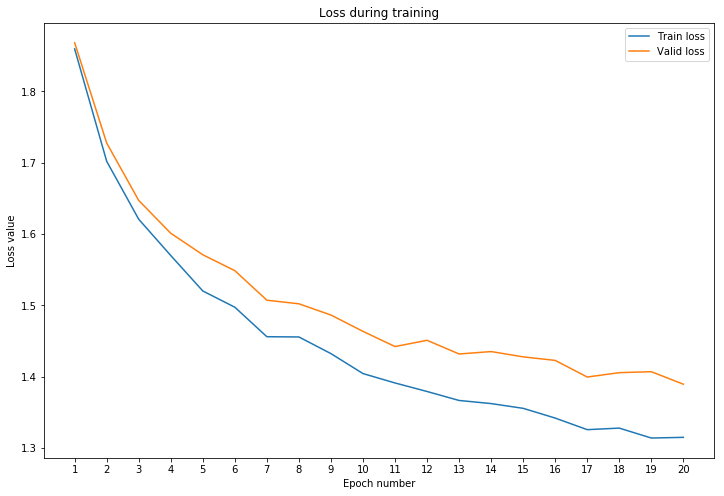

In [14]:
# this cell was copied from file "03 Build model.ipynb"
# names_learner_t80_v20.fit(EPOCH_NUM_ITER, criterion, optim_t80_v20, use_dropout = USE_DROPOUT)
# names_learner_t80_v20.plot_loss()

For names generation greedy search algorithm was used. Generation was done without dropout (dropout was used only during model training). Some names generated by model are real names. As stated above final model was selected to be compromise between models with minimal loss function on validation set (those models overfit to training and generate many more real names) and models that do not overfit but have higher loss (names generated by those models lack in suffix diversity and subjectively do not really well resemble real names).

In below data frame names generated from final model are presented.

In [17]:
# this cell was copied from file "03 Build model.ipynb"
# names_learner_t80_v20.generate_and_print_names()

Even for the same hyperparameters each model training results in different generated names. This is due to randomness in training process (random initial weights, use of dropout, random shuffle of observations in data loader). Below is presented another data frame with names generated by other model using hyperparameters the same as above.

In [347]:
# this cell was copied from file "03 Build model.ipynb"
# names_learner_t80_v20.generate_and_print_names()

### Comment on final results that is on names generated by trained model.

The purpose of model training was to train model so as generated names resemble real names. For this purpose compromise for training was made. The final model was selected to be compromise between models with minimal loss function on validation set (those models overfit to training and generate many more real names) and models that do not overfit but have higher loss (names generated by those models lack in suffix diversity and subjectively do not really well resemble real names).

Let discuss generated names from qualitative perspective.


1. Trained model really well captures difference between male and female names in Polish language. In Polish language female names usually end with letter "a" and male names usually doesn't end with letter "a". This rule is clearly visible in generated names. 
2. Some generated pair names in the same category of origin relate directly to each other e.g. in first data frame pair names: Elina and Elin, in second data frame: Trzebora, Trzebor.
3. Generated names in each category have suffixes representative to that category e.g. some Slavic names have suffixes "-sław", "-sława", some Latin names have suffixes like "-usz" etc.
4. In each category there is a diversity of suffixes used.
5. Some generated names resemble real names and seem to be only slight modifications of real names e.g. generated name Nitold resembles real name Witold, Toman resembles Tomasz, Ortermiusz resembles real name Artemiusz etc. Because of that generated names very much resemble real names.